In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import netCDF4
from seabird import fCNV
import pandas as pd
import os
import seaborn as sns
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import gsw

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# organise the data folder
# ! mkdir CTD_data_processed/1hz
# ! mkdir CTD_data_processed/1db
# ! mkdir CTD_data_processed/plain

In [4]:
# ! find CTD_data_processed/* . -type f -name '*1db.cnv' -exec mv -t CTD_data_processed/1db {} +
# ! find CTD_data_processed/* . -type f -name '*1hz.cnv' -exec mv -t CTD_data_processed/1hz {} +
# ! cd CTD_data_processed/ | mv *.cnv plain/

In [5]:
import dask.array as da
from dask.diagnostics import ProgressBar

In [6]:
from tqdm import tqdm

In [7]:
# load data and store in a dictionary of DataFrames
# each CTD cast is a DataFrame, named 'cast_1','cast_2', etc. There are 76 casts in total
os.chdir('C://Users/Suki/Documents/Falkor/CTD_data_processed/plain')
ctd = {'cast_'+str(1+k): fCNV(os.listdir()[k]).as_DataFrame() for k in tqdm(range(0,76))}

 66%|█████████████████████████████████████████████████████▉                            | 50/76 [19:46<10:17, 23.74s/it]DEBUG:root:Openning file: ANA07CCTD51.cnv


100%|██████████████████████████████████████████████████████████████████████████████████| 76/76 [29:27<00:00, 23.26s/it]


In [14]:
ctd['cast_76']# take a look

,CNDC2,DEPTH,LATITUDE,LONGITUDE,PRES,PSAL,PSAL2,TEMP,TEMP2,c0mS/cm,flECO-AFL,flag,oxigen_ml_L,par,scan,timeS,xmiss
0,NaN,1.319,-74.892667,165.0885,1.333,36.1564,NaN,-1.6068,-1.5349,28.493161,1.2122,NaN,6.6537,11.1060,1.0,0.000,89.6522
1,NaN,1.341,-74.892667,165.0885,1.355,36.1974,NaN,-1.6067,-1.5385,28.522500,1.2137,NaN,6.6552,11.0710,2.0,0.042,89.6629
2,NaN,1.366,-74.892667,165.0885,1.380,36.2574,NaN,-1.6067,-1.5443,28.565379,1.2149,NaN,6.6551,10.9840,3.0,0.083,89.6694
3,NaN,1.391,-74.892667,165.0885,1.406,36.3279,NaN,-1.6068,-1.5501,28.615572,1.2136,NaN,6.6536,10.8760,4.0,0.125,89.6715
4,NaN,1.420,-74.892667,165.0885,1.435,36.4099,NaN,-1.6068,-1.5545,28.674090,1.2118,NaN,6.6529,10.8030,5.0,0.167,89.6771
5,NaN,1.448,-74.892667,165.0885,1.463,36.5045,NaN,-1.6067,-1.5580,28.741700,1.2099,NaN,6.6533,10.7750,6.0,0.208,89.7069
6,1.579307,1.476,-74.892667,165.0885,1.491,36.6031,18.9458,-1.6064,-1.5616,28.812246,1.2003,NaN,6.6540,10.7580,7.0,0.250,89.7748
7,2.149640,1.504,-74.892667,165.0885,1.520,36.6892,26.5005,-1.6053,-1.5646,28.874582,1.1818,NaN,6.6553,10.7240,8.0,0.292,89.8419
8,2.295369,1.532,-74.892667,165.0885,1.548,36.7518,28.4712,-1.6016,-1.5650,28.922464,1.1670,NaN,6.6551,10.6470,9.0,0.333,89.8663
9,2.415632,1.559,-74.892667,165.0885,1.575,36.7992,30.1050,-1.5952,-1.5608,28.961919,1.1622,NaN,6.6536,10.5200,10.0,0.375,89.8663


# Positions of CTD Profiles 2017

In [15]:
lats = [ctd['cast_'+str(1+i)].LATITUDE[0] for i in range(0,76)]
lons = [ctd['cast_'+str(1+i)].LONGITUDE[0]+0.3 for i in range(0,76)]

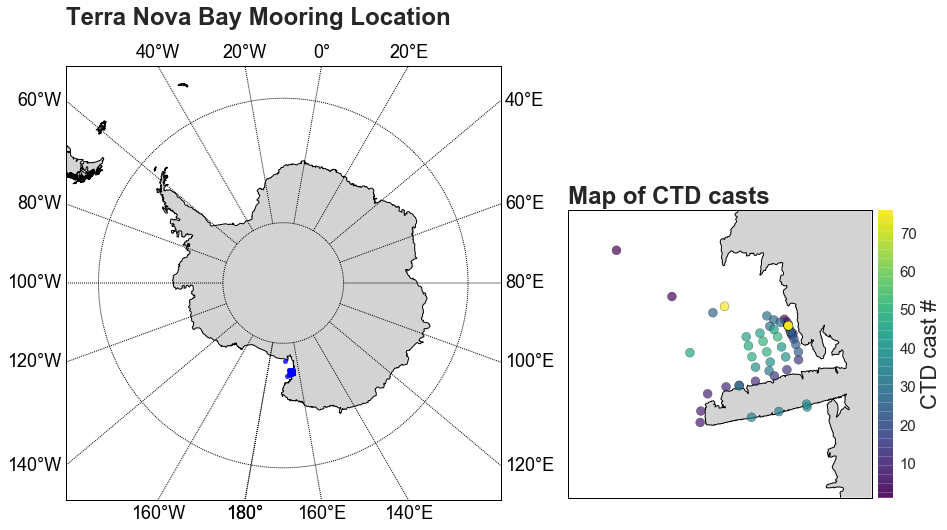

In [10]:
sns.set(font_scale=1.5)
fig = plt.figure(num=None, figsize=(12,8))
ax = plt.axes()
m = Basemap(projection='spstere',boundinglat=-55,lon_0=170, resolution='l')
m.drawmapboundary(fill_color='white')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.),labels=[])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[True, True, True, True])
m.fillcontinents(color='lightgrey', lake_color='white')
x,y = m(lons, lats)
m.plot(x,y,'bo',markersize=5,alpha=0.8)
plt.title('Terra Nova Bay Mooring Location',fontweight='bold',loc='left',FontSize=24,y=1.08)
ax2 = plt.axes([.78, .13, .5, .5])
m2 = Basemap(projection='merc',llcrnrlon=169,urcrnrlon=162, llcrnrlat=-76, urcrnrlat=-74.3, resolution='h')
m2.drawmapboundary(fill_color='white')
m2.drawcoastlines()
m2.drawparallels(np.arange(-80.,81.,20.))
m2.drawmeridians(np.arange(-180.,181.,20.))
m2.fillcontinents(color='lightgrey', lake_color='white')
x,y = m2(lons, lats)
colors = np.linspace(1,76,76)
sns.set(font_scale=1.5)
m2.scatter(x,y,c=colors,cmap='viridis',s=80,alpha=0.7,zorder=10,edgecolor='k')
cbar = m2.colorbar()
cbar.set_label('CTD cast #',FontSize=22)
plt.title('Map of CTD casts',fontweight='bold',loc='left',FontSize=24)
plt.show()

# Pressure-Temperature 2017 profiles

In [16]:
import pylab
number_colours = 76
cm = pylab.get_cmap('viridis')
color=[]
for i in range(number_colours):
    color.append(cm(1.*i/number_colours))  # color will now be an RGBA tuple

Text(0,1,'Temperature profiles')

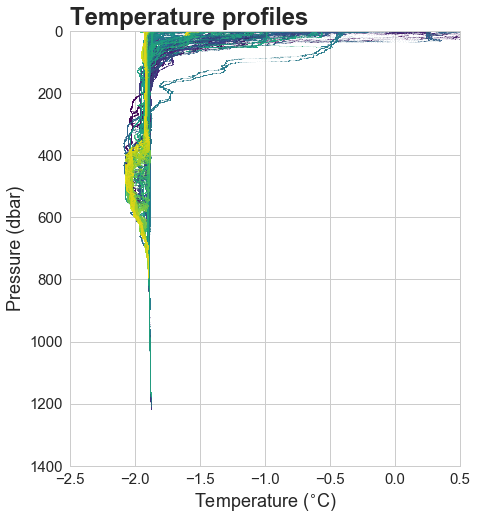

In [12]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
fig = plt.figure(figsize=(7,8))
ax=plt.gca()
for key in ctd:
    plt.scatter(ctd[key]['TEMP'], ctd[key]['DEPTH'], c=color[list(ctd.keys()).index(key)],cmap='viridis', s=0.005, alpha=0.8)
ax.set_ylim([1400, 0])
ax.set_xlim([-2.5, 0.5])
ax.set_ylabel('Pressure (dbar)',FontSize=18)
ax.set_xlabel('Temperature ($^{\circ}$C)', FontSize=18)
ax.set_title('Temperature profiles',loc='left',fontweight='bold',FontSize=24)

# Temperature-Salinity 2017 profiles

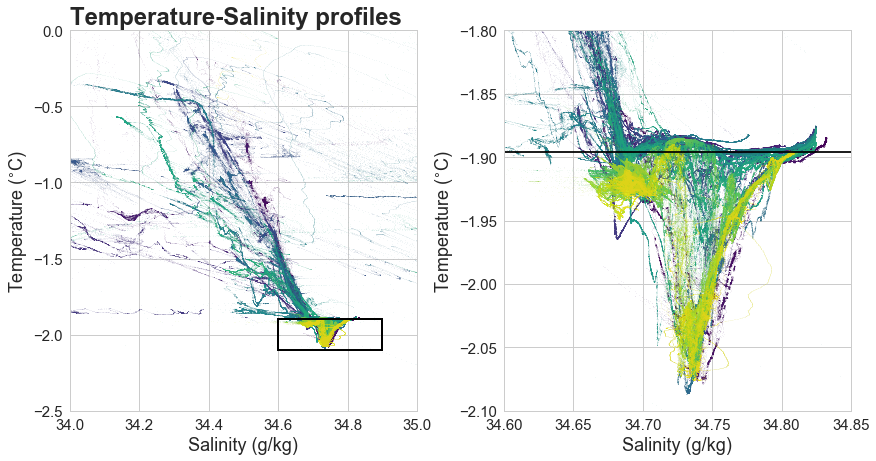

In [25]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(14,7), nrows = 1, ncols = 2)
for key in ctd:
    axes[0].scatter(ctd[key]['PSAL2'], ctd[key]['TEMP2'], c=color[list(ctd.keys()).index(key)],cmap='magma', s=0.005, alpha=0.8)
    axes[1].scatter(ctd[key]['PSAL2'], ctd[key]['TEMP2'], c=color[list(ctd.keys()).index(key)],cmap='magma', s=0.005, alpha=0.8)
axes[0].set_ylim([-2.5, 0])
axes[0].set_xlim([34, 35])
axes[0].set_ylabel('Temperature ($^{\circ}$C)',FontSize=18)
axes[0].set_xlabel('Salinity (g/kg)', FontSize=18)
axes[0].set_title('Temperature-Salinity profiles',loc='left',fontweight='bold',FontSize=24)    
axes[1].set_ylim([-2.1, -1.8])
axes[1].set_xlim([34.6, 34.85])
axes[1].set_ylabel('Temperature ($^{\circ}$C)',FontSize=18)
axes[1].set_xlabel('Salinity (g/kg)', FontSize=18)
import matplotlib.patches as patches
rect = patches.Rectangle((34.6,-2.1),0.3,0.2,linewidth=2,edgecolor='k',facecolor='none')
axes[0].add_patch(rect)
axes[1].plot([34.6,34.85],[freeze_mean, freeze_mean],'k')
fig.subplots_adjust(wspace=.25)

# Means

In [19]:
# surface layer means
ind= [ctd[key][ctd[key]['DEPTH'] <= 20].index for key in ctd]
depth_surf = [ctd[key][ctd[key]['DEPTH'] <= 20]['DEPTH'] for key in ctd]
temp_surf = [ctd[key][ctd[key]['DEPTH'] <= 20]['TEMP'] for key in ctd]
psal_surf = [ctd[key][ctd[key]['DEPTH'] <= 20]['PSAL'] for key in ctd]
    
d_means = pd.DataFrame()
d_means['ind'] = [ind[i] for i in range(0,76)]
d_means['depth_surf'] = [depth_surf[i].mean() for i in range(0,76)]
d_means['temp_surf'] = [temp_surf[i].mean() for i in range(0,76)]
d_means['psal_surf'] = [psal_surf[i].mean() for i in range(0,76)]

In [20]:
# other layers
for i in range(0,20,1):
    ind= [ctd[key][(ctd[key]['DEPTH']>=(20 + i*50)) & (ctd[key]['DEPTH']<(70 + i*50))].index for key in ctd]
    depth_layer = [ctd[key][(ctd[key]['DEPTH']>=(20 + i*50)) & (ctd[key]['DEPTH']<(70 + i*50))] for key in ctd]
    temp_layer = [ctd[key][(ctd[key]['DEPTH']>=(20 + i*50)) & (ctd[key]['DEPTH']<(70 + i*50))]['TEMP'] for key in ctd]
    psal_layer = [ctd[key][(ctd[key]['DEPTH']>=(20 + i*50)) & (ctd[key]['DEPTH']<(70 + i*50))]['PSAL'] for key in ctd]
    
    d_means['ind_'+str(70 + i*50)] = [ind[i] for i in range(0,76)]
    d_means['depth_'+str(70 + i*50)] = [depth_layer[i].mean() for i in range(0,76)]
    d_means['temp_'+str(70 + i*50)] = [temp_layer[i].mean() for i in range(0,76)]
    d_means['psal_'+str(70 + i*50)] = [psal_layer[i].mean() for i in range(0,76)]

In [21]:
import scipy
from numpy import meshgrid
from scipy.interpolate import griddata

In [ ]:
# fig, axes = plt.subplots(figsize=(10,10),nrows=3,ncols=3, sharex='all', sharey='all')
# x = [ctd[key]['LONGITUDE'].mean() for key in ctd]
# y = [ctd[key]['LATITUDE'].mean() for key in ctd]
# plt.title('Mean surface temperature',fontweight='bold',loc='left',FontSize=24)
# z = d_means['temp_surf'].values
# for i in range(0,3):
#     for j in range(0,3):
#         m3 = Basemap(ax=axes[i,j],projection='merc',llcrnrlon=163,urcrnrlon=167, llcrnrlat=-75.6, urcrnrlat=-74.8, resolution='h')
#         m3.drawmapboundary(fill_color='white')
#         m3.drawcoastlines()
#         m3.drawparallels(np.arange(-80.,81.,20.))
#         m3.drawmeridians(np.arange(-180.,181.,20.))
#         m3.fillcontinents(color='lightgrey', lake_color='white')
#         xm,ym = m3(x, y)
#         axes[i,j].plot(xm,ym,'wo',alpha=0.5,markersize=10, markeredgecolor='k', markeredgewidth=1)
#         # interpolate scatter to regular grid
#         numIndexes = 50 # set resolution for mesh
#         xi = np.linspace(np.min(x), np.max(x),numIndexes)
#         yi = np.linspace(np.min(y), np.max(y),numIndexes)
#         xi,yi = meshgrid(xi, yi)
#         zi = griddata((x, y), z,(xi, yi),method='linear')
#         xmi,ymi = m3(xi,yi)
#         contour = m3.contourf(xmi,ymi,zi,cmap='Blues_r',vmin=-2.1,vmax=1.4)
#         z = d_means['temp_'+str(70 + i*50)].values
#         cbar = m3.colorbar(contour)
#         cbar.set_label('Temperature (C)',FontSize=18)


# Mixed Layer Depths

Density-based MLD calculations

In [23]:
mld = []
freeze=[]
for key in ctd:
    SP = ctd[key]['PSAL2'].values
    p = ctd[key]['PRES'].values
    lon = ctd[key]['LONGITUDE'].unique()
    lat = ctd[key]['LATITUDE'].unique()
    SA = gsw.SA_from_SP(SP,p,lon,lat)
    t = ctd[key]['TEMP'].values

    # potential densities calculated from TEOS-10 equations
    ctd[key]['pot_rho'] = pd.Series(gsw.pot_rho_t_exact(SA,t,p,p_ref=0))
    ctd[key]['sigma_t'] = pd.Series(ctd[key]['pot_rho'] - 1000)

    # reference potential density at 10-20m depth average
    reference = ctd[key][(ctd[key]['DEPTH']>10) & (ctd[key]['DEPTH']<20)].mean()
    SP_ref = reference['PSAL']
    pres_ref = reference['PRES']
    t_ref = reference['TEMP']
    SA_ref = gsw.SA_from_SP(SP_ref,pres_ref,lon,lat)
    pot_rho_ref = gsw.pot_rho_t_exact(SA_ref,t_ref,pres_ref,p_ref=0)
    sigma_t_ref = pot_rho_ref - 1000
    mld_sigma = sigma_t_ref + 0.2
    # find nearest index where the mld criteria is met
    match_ind = ctd[key]['sigma_t'].index[(ctd[key]['sigma_t']-mld_sigma).abs().argsort()[0]]
    # Therefore ,the mixed layer depth (mld)
    mld.append(ctd[key]['DEPTH'][match_ind])
    sat_frac = reference['oxigen_ml_L']/1000
    freeze.append(gsw.t_freezing(SA_ref,pres_ref,sat_frac))

In [24]:
# calculate surface freezing point
freeze_mean = sum(freeze)/len(freeze)
count=0
for i in range(0,len(freeze)):
    diff = (freeze[i] - freeze_mean)
    tolerance = np.std(freeze)
    if diff > tolerance*0.05:
        freeze[i] = 0
        count+=1
freeze_mean = sum(freeze)/( len(freeze) - count)
freeze_mean

array([-1.89613136])

Text(0.5,0,'Mixed Layer Depths (m)')

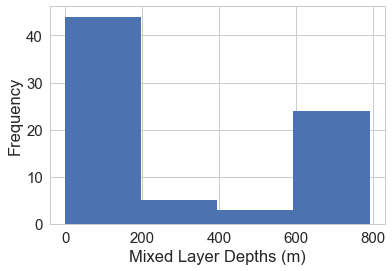

In [26]:
mld = pd.Series(mld,name='MLD')
mld.plot(kind='hist',bins =4)
plt.xlabel('Mixed Layer Depths (m)')

In [27]:
mld = pd.concat([mld,pd.Series(lons, name='lons'),pd.Series(lats, name='lats')],axis=1);

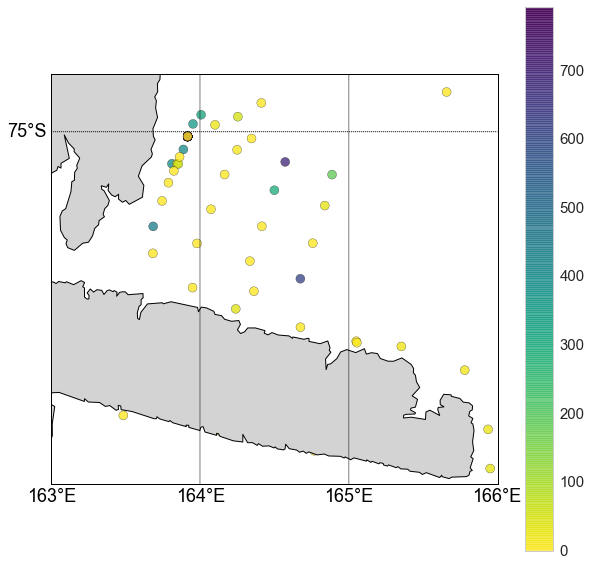

In [28]:
fig = plt.figure(figsize=(10,10))
m7 = Basemap(projection='merc',llcrnrlon=163,urcrnrlon=166, llcrnrlat=-75.6, urcrnrlat=-74.9, resolution='h')
m7.drawmapboundary(fill_color='white')
m7.drawcoastlines()
m7.drawparallels(np.arange(-80.,81.,1.),labels=[True])
m7.drawmeridians(np.arange(-180.,181.,1.),labels=[False,False,False,True])
m7.fillcontinents(color='lightgrey', lake_color='white')
x,y = m7(mld['lons'].values, mld['lats'].values)
plt.scatter(x,y,c=mld['MLD'].values,cmap='viridis_r',alpha=0.8,s=80,edgecolor='k')
plt.colorbar()


In [29]:
mld['temp_surf'] = d_means['temp_surf']

Text(0,1,'Surface temperatures in Terra Nova Bay')

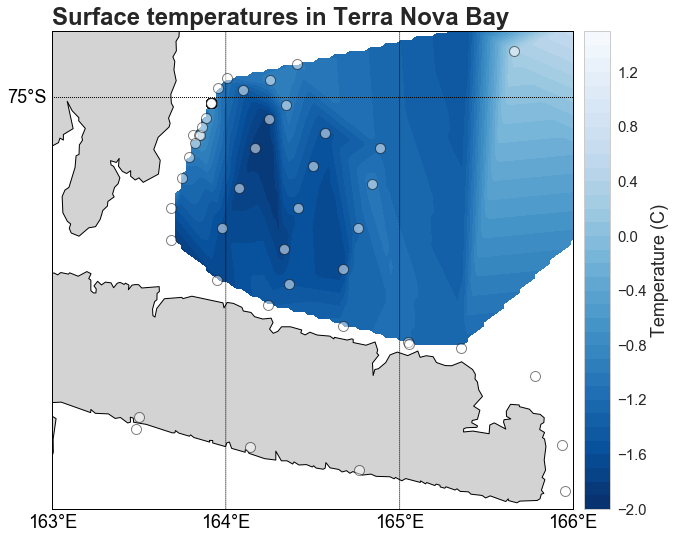

In [30]:
# ignore data away from main bay area! - so latitudes below -75.4 and above 74.8
mld_bay = mld[(mld['lats']>=-75.4) & (mld['lats']<=-74.8)]
lons_bay = mld_bay['lons'].values
lats_bay= mld_bay['lats'].values
fig = plt.figure(figsize=(10,10))
z = mld_bay['temp_surf'].values
m6 = Basemap(projection='merc',llcrnrlon=163,urcrnrlon=166, llcrnrlat=-75.6, urcrnrlat=-74.9, resolution='h')
m6.drawmapboundary(fill_color='white')
m6.drawcoastlines()
m6.drawparallels(np.arange(-80.,81.,1.),labels=[True])
m6.drawmeridians(np.arange(-180.,181.,1.),labels=[False,False,False,True])
m6.fillcontinents(color='lightgrey', lake_color='white')
x,y = m6(lons, lats)
plt.plot(x,y,'wo',alpha=0.5,markersize=10, markeredgecolor='k', markeredgewidth=1)
# interpolate scatter to regular grid
numIndexes = 100 # set resolution for mesh
xi = np.linspace(np.min(lons_bay), np.max(lons_bay),numIndexes)
yi = np.linspace(np.min(lats_bay), np.max(lats_bay),numIndexes)
xi,yi = meshgrid(xi, yi)
zi = griddata((lons_bay, lats_bay), z,(xi, yi),method='linear')
xmi,ymi = m6(xi,yi)
contour = m6.contourf(xmi,ymi,zi,cmap='Blues_r',levels=np.linspace(-2,1.5,36))
cbar = m6.colorbar(contour)
cbar.set_label('Temperature (C)',FontSize=18)
plt.title('Surface temperatures in Terra Nova Bay',loc='left',FontSize=24, fontweight='bold')

Text(0,1,'Mixed Layer Depths in Terra Nova Bay')

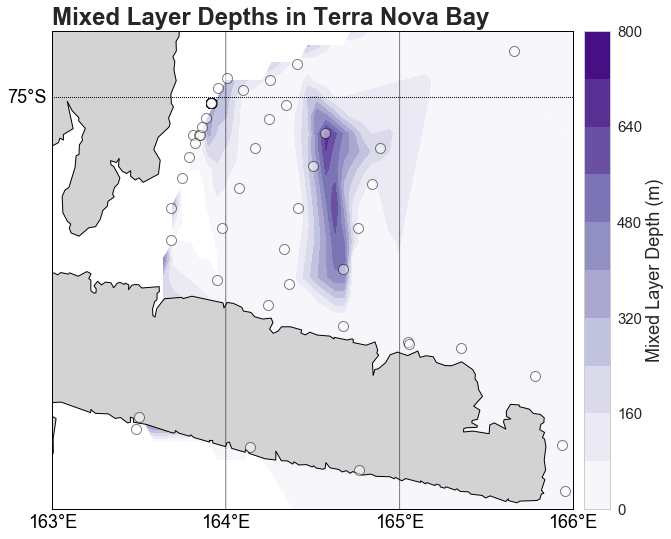

In [31]:
fig = plt.figure(figsize=(10,10))
z = mld['MLD'].values
m4 = Basemap(projection='merc',llcrnrlon=163,urcrnrlon=166, llcrnrlat=-75.6, urcrnrlat=-74.9, resolution='h')
m4.drawmapboundary(fill_color='white')
m4.drawcoastlines()
m4.drawparallels(np.arange(-80.,81.,1.),labels=[True])
m4.drawmeridians(np.arange(-180.,181.,1.),labels=[False,False,False,True])
m4.fillcontinents(color='lightgrey', lake_color='white')
x,y = m4(lons, lats)
plt.plot(x,y,'wo',alpha=0.5,markersize=10, markeredgecolor='k', markeredgewidth=1)
# interpolate scatter to regular grid
numIndexes = 100 # set resolution for mesh
xi = np.linspace(np.min(lons), np.max(lons),numIndexes)
yi = np.linspace(np.min(lats), np.max(lats),numIndexes)
xi,yi = meshgrid(xi, yi)
zi = griddata((lons, lats), z,(xi, yi),method='linear')
xmi,ymi = m4(xi,yi)
contour = m4.contourf(xmi,ymi,zi,cmap='Purples',levels=np.linspace(0,800,11))
cbar = m4.colorbar(contour)
cbar.set_label('Mixed Layer Depth (m)',FontSize=18)
plt.title('Mixed Layer Depths in Terra Nova Bay',loc='left',FontSize=24, fontweight='bold')

# Water masses

In [ ]:
AASW_list = []
for key in ctd:
    AASW_list.append(pd.Series(ctd[key][(ctd[key]['TEMP']<=-0.01) & (ctd[key]['TEMP']>=-1.75) & 
             (ctd[key]['PSAL']<=34.05) & (ctd[key]['PSAL']>=33.67)].index))
AASW = pd.concat(AASW_list)
    
CDW_list = []
for key in ctd:
    CDW_list.append(pd.Series(ctd[key][(ctd[key]['TEMP']>=1.) & 
             (ctd[key]['PSAL2']<=34.72) & (ctd[key]['PSAL2']>=34.7)].index))
CDW = pd.concat(CDW_list)
CDW

In [ ]:
AASW[3].values()

In [ ]:
ctd['cast_4']